Necessary Code Imports

In [1]:
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import random
import cv2
import tensorflow
import keras



from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Conv2D, ReLU, Concatenate, Conv2DTranspose
from keras.models import Model
from keras.layers import MaxPooling2D, Input, Conv2D, UpSampling2D, BatchNormalization
from keras.callbacks import EarlyStopping
## print("Done importing")


2023-04-01 22:50:10.948636: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Static code variables declarations

In [3]:
save_model_name = "awb"
# Size of the training images to be set before traingin
img_size = 256

#Array declartions for train/test images along with groung truth images
train_images = []
ground_truth_images = []
use_saved_model = True

Collect images  - Iterate over folder to obtain images.

In [4]:
path=r"images/Bad"
counter_train_image = 0;
for image in os.listdir(path):
    # filteration to avoid hidden file added by MacOS
    if (image != ".DS_Store"):
        # Repeatedly iterate the folder to obtain all images
        imgages = cv2.imread(os.path.join(path,image) ,cv2.IMREAD_COLOR)
        # Resize the images for normalization
        train_images_array = cv2.resize(imgages, (img_size, img_size))
        train_images.append(train_images_array)
        print("Saved train color image :",counter_train_image)
        counter_train_image+=1


path=r"images/Good"
counter_ground_image = 0;
for image in os.listdir(path):
    # filteration to avoid hidden file added by MacOS
    if (image != ".DS_Store"):
        # Repeatedly iterate the folder to obtain all images
        imgages = cv2.imread(os.path.join(path,image) ,cv2.IMREAD_COLOR)
        # Resize the images for normalization
        ground_images_array = cv2.resize(imgages, (img_size, img_size))
        ground_truth_images.append(ground_images_array)
        print("Saved ground image :",counter_ground_image)
        counter_ground_image+=1

Saved train color image : 0
Saved train color image : 1
Saved train color image : 2
Saved train color image : 3
Saved train color image : 4
Saved train color image : 5
Saved train color image : 6
Saved train color image : 7
Saved train color image : 8
Saved train color image : 9
Saved train color image : 10
Saved train color image : 11
Saved train color image : 12
Saved train color image : 13
Saved train color image : 14
Saved train color image : 15
Saved train color image : 16
Saved train color image : 17
Saved train color image : 18
Saved train color image : 19
Saved train color image : 20
Saved train color image : 21
Saved train color image : 22
Saved train color image : 23
Saved train color image : 24
Saved train color image : 25
Saved train color image : 26
Saved train color image : 27
Saved train color image : 28
Saved train color image : 29
Saved train color image : 30
Saved train color image : 31
Saved train color image : 32
Saved train color image : 33
Saved train color image 

Normalization of the images and splitting them for train and test

In [10]:
train_images = (np.array(train_images))/255
ground_truth_images = (np.array(ground_truth_images))/255
train_image_for_train, train_image_for_test, ground_truth_train, ground_truth_test = train_test_split(train_images, ground_truth_images, test_size=0.2)
#print(len(train_image_for_train))
#print(len(train_image_for_test))
#print(len(ground_truth_train))
#print(len(ground_truth_test))

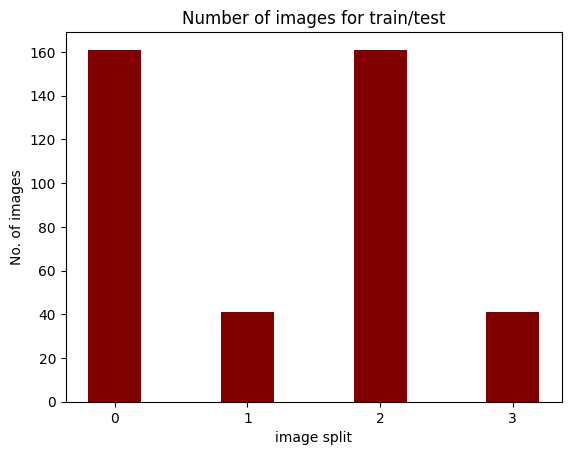

Legend

0 - train_image_for_train  161
1 - train_image_for_test  41
2 - ground_truth_train  161
3 - ground_truth_test  41


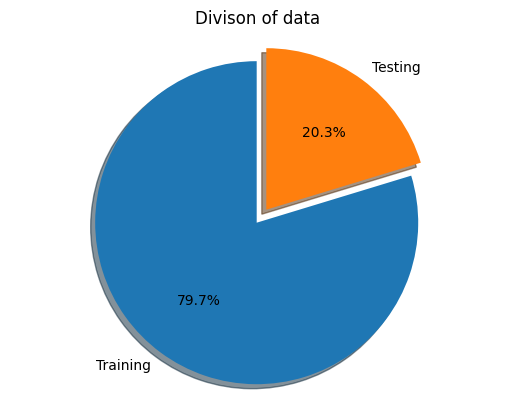

Total Data set Size:  404
Train Image Size :  322
Test Image Size :  82


In [28]:
data = {'0':len(train_image_for_train), "1":len(train_image_for_test), '2':len(ground_truth_train),"3":len(ground_truth_test)}
images = list(data.keys())
values = list(data.values())
plt.bar(images, values, color ='maroon',width = 0.4)
plt.xlabel("image split")
plt.ylabel("No. of images")
plt.title("Number of images for train/test")
plt.show()

print("Legend\n")
print("0 - train_image_for_train ",len(train_image_for_train))
print("1 - train_image_for_test ",len(train_image_for_test))
print("2 - ground_truth_train ",len(ground_truth_train))
print("3 - ground_truth_test ",len(ground_truth_test))

labels = 'Training', 'Testing'

sizes = [len(train_image_for_train) + len(ground_truth_train), len(train_image_for_test) + len(ground_truth_test)]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%",
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Divison of data")
plt.show()

print("Total Data set Size: ",len(train_image_for_train) + len(ground_truth_train) + len(train_image_for_test) + len(ground_truth_test))
print("Train Image Size : ",len(train_image_for_train) + len(ground_truth_train) )
print("Test Image Size : ",len(train_image_for_test) + len(ground_truth_test))


Convolution Neural Network

In [69]:

# Define the input layer
input_layer = Input(shape=(256, 256, 3), name="Main Input")

# Define the encoder layers
encoder_inc = Conv2D(24, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', name="encoder_inc")(input_layer)
encoder_down1 = Conv2D(48, kernel_size=(3,3), strides=(2,2), padding='same', activation='relu', name="encoder_down1")(encoder_inc)
encoder_down2 = Conv2D(96, kernel_size=(3,3), strides=(2,2), padding='same', activation='relu', name="encoder_down2")(encoder_down1)
encoder_down3 = Conv2D(192, kernel_size=(3,3), strides=(2,2), padding='same', activation='relu', name="encoder_down3")(encoder_down2)

# Define the bridge layers
encoder_bridge_down = Conv2D(384, kernel_size=(3,3), strides=(2,2), padding='same', activation='relu', name="encoder_bridge_down")(encoder_down3)
encoder_bridge_up = Conv2DTranspose(192, kernel_size=(3,3), strides=(2,2), padding='same', activation='relu', name="encoder_bridge_up")(encoder_bridge_down)

#Define the decoder layers
print(encoder_down3, encoder_bridge_up)
concatenate_8 = Concatenate()([encoder_down3, encoder_bridge_up])
sequential_8 = Sequential([
    Conv2D(192, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    Conv2D(192, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    Conv2D(192, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')
], name="sequential_8")(concatenate_8)
conv2d_transpose_9 = Conv2DTranspose(96, kernel_size=(3,3), strides=(2,2), padding='same', activation='relu', name="conv2d_transpose_9")(sequential_8)

concatenate_9 = Concatenate()([encoder_down2, conv2d_transpose_9])
sequential_9 = Sequential([
    Conv2D(96, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    Conv2D(96, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    Conv2D(96, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')
], name="sequential_9")(concatenate_9)
conv2d_transpose_10 = Conv2DTranspose(48, kernel_size=(3,3), strides=(2,2), padding='same', activation='relu', name="conv2d_transpose_10")(sequential_9)

concatenate_10 = Concatenate()([encoder_down1, conv2d_transpose_10])
sequential_10 = Sequential([
    Conv2D(48, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    Conv2D(48, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    Conv2D(48, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')
], name="sequential_10")(concatenate_10)
conv2d_transpose_11 = Conv2DTranspose(24, kernel_size=(3,3), strides=(2,2), padding='same', activation='relu', name="conv2d_transpose_11")(sequential_10)

concatenate_11 = Concatenate()([input_layer, conv2d_transpose_11])
sequential_11 = Sequential([
    Conv2D(3, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    Conv2D(3, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    Conv2D(3, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')
], name="sequential_11")(concatenate_11)

KerasTensor(type_spec=TensorSpec(shape=(None, 32, 32, 192), dtype=tf.float32, name=None), name='encoder_down3/Relu:0', description="created by layer 'encoder_down3'") KerasTensor(type_spec=TensorSpec(shape=(None, 32, 32, 192), dtype=tf.float32, name=None), name='encoder_bridge_up/Relu:0', description="created by layer 'encoder_bridge_up'")


In [ ]:
model = Model(inputs=input_layer, outputs=sequential_11)
model.compile(optimizer='Adam', loss='mse')
if use_saved_model:
    model = keras.models.load_model("awb.h5")
else:
    model = model.fit(train_image_for_train, ground_truth_train, epochs=20, batch_size=32, validation_data=(train_image_for_test, ground_truth_test))
#model.save("awb.h5")